<a href="https://colab.research.google.com/github/Eylz-Liu/ALM-study/blob/main/Etude_GSE_PRS5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1 - Importation de tirage


In [9]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance
import shap
import statsmodels.api as sm

# Définir les bornes de colonnes
col_start = 1   # [ 2025(1) - 2034(10) ]  [ 2025(11) - 2044(20) ]
col_end   = 43  # correspond à la colonne 11

# Fonction de extraction des données historiques

In [42]:
def load_matrix_from_excel(filename, sheet_name, print_title="data_array shape"):
    from google.colab import files
    uploaded = files.upload()
    df = pd.read_excel(filename, sheet_name=sheet_name, header=None)

    df = pd.read_excel(filename, sheet_name=sheet_name, header=None)
    df = df.iloc[1:].reset_index(drop=True)

    # Extraire les colonnes BE et PVFP
    date_array = df.iloc[:, 0].values
    data_array = df.iloc[:, 1].values

    # Affichage complet des DataFrames
    #print(df.head())
    print("Shape du fichier :", df.shape)
    print("date_array.shape :\n", date_array.shape)
    print(f"{print_title} :\n", data_array.shape)

    return date_array, data_array

# Extraction TEC 10ans jusuq'à 2004

In [43]:
date_array, tec_array = load_matrix_from_excel("TEC10_bis.xlsx", "TEC10_", print_title="TEC10_array shape")

Saving TEC10_bis.xlsx to TEC10_bis (3).xlsx
Shape du fichier : (7699, 2)
date_array.shape :
 (7699,)
TEC10_array shape :
 (7699,)


# Extraction de TEC10ans only 2025

In [5]:
date_array, tec25_array = load_matrix_from_excel("TEC10_bis.xlsx", "TEC10_2025", print_title="TEC10_2025_array shape")

Shape du fichier : (335, 2)
date_array.shape :
 (335,)
TEC10_2025_array shape :
 (335,)


# Extraction de inflation france

In [54]:
date_inf_array, inflation_array = load_matrix_from_excel("Inflation_Y.xlsx", "Inflation_Y", print_title="inflation_array shape")

Saving Inflation_Y.xlsx to Inflation_Y (1).xlsx
Shape du fichier : (65, 2)
date_array.shape :
 (65,)
inflation_array shape :
 (65,)


# Série temporelle - stationnaire

Création d'une série temporelle avec Datetime

           TEC10
date            
2025-12-01  3.45
2025-11-30   NaN
2025-11-29   NaN
2025-11-28  3.41
2025-11-27  3.41
Moyenne stationnaire : 2.22587587995554
Écart-type stationnaire : 1.4326445590648231


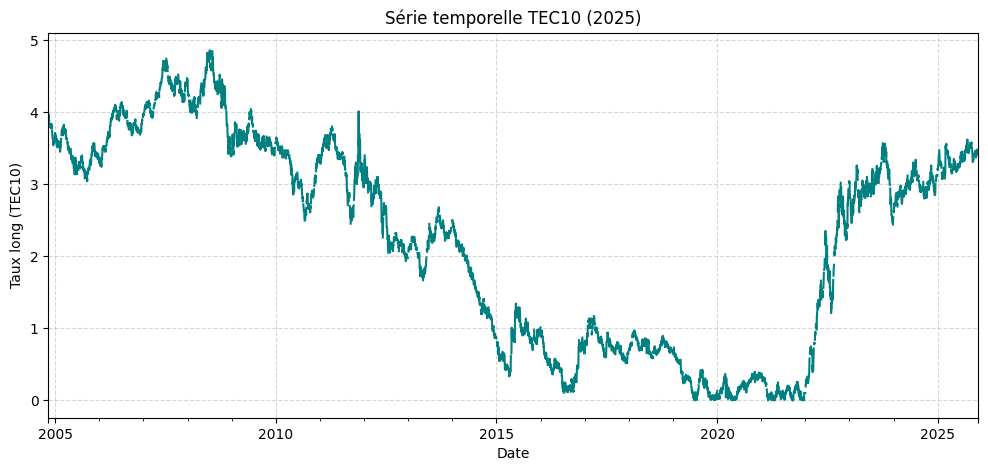

In [44]:
# Construire un DataFrame avec tes arrays
ts_df = pd.DataFrame({
    "date": date_array,
    "TEC10": tec_array
})

# Convertir en datetime (si ce n'est pas déjà le cas)
ts_df["date"] = pd.to_datetime(ts_df["date"])

# Mettre la date comme index
ts_df = ts_df.set_index("date")

# Afficher la série temporelle
print(ts_df.head())

# Calculer la moyenne stationnaire (moyenne historique)
mean_stationnaire = ts_df["TEC10"].mean()
std_stationnaire = ts_df["TEC10"].std()

print("Moyenne stationnaire :", mean_stationnaire)
print("Écart-type stationnaire :", std_stationnaire)

# Tracer la série temporelle
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
ts_df["TEC10"].plot(color="teal")
plt.title("Série temporelle TEC10 (2025)")
plt.xlabel("Date")
plt.ylabel("Taux long (TEC10)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Moyenne mensuelle

Moyenne stationnaire (mensuelle) :
                TEC10
date                
2004-11-30    3.8525
2004-12-31  3.652609
2005-01-31   3.59381
2005-02-28    3.5845
2005-03-31  3.745238
...              ...
2025-08-31  3.424762
2025-09-30  3.511818
2025-10-31  3.435217
2025-11-30     3.435
2025-12-31      3.45

[254 rows x 1 columns]
Ecart-type stationnaire (mensuel) :
                TEC10
date                
2004-11-30  0.065685
2004-12-31  0.076765
2005-01-31  0.051232
2005-02-28  0.097250
2005-03-31  0.038938
...              ...
2025-08-31  0.073118
2025-09-30  0.055945
2025-10-31  0.079021
2025-11-30  0.025236
2025-12-31       NaN

[254 rows x 1 columns]
Moyenne stationnaire (jour) :
 TEC10    2.225876
dtype: object
Ecart-type stationnaire (jour) :
 TEC10    1.432645
dtype: object


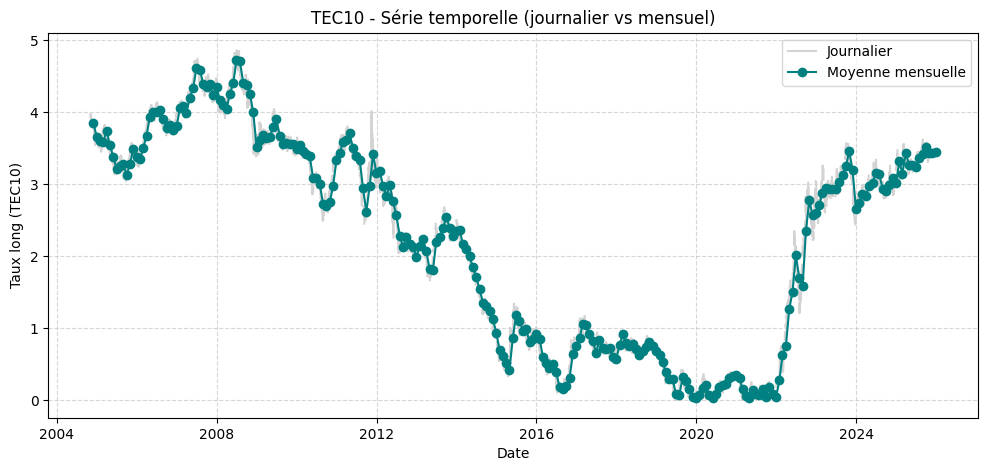

In [13]:
# Construire le DataFrame avec tes arrays
ts_df = pd.DataFrame({
    "date": date_array,
    "TEC10": tec_array
})

# Convertir en datetime et mettre comme index
ts_df["date"] = pd.to_datetime(ts_df["date"])
ts_df = ts_df.set_index("date")

# --- Résampling mensuel ---
# Moyenne mensuelle
ts_monthly = ts_df.resample("ME").mean()
ts_meanj = ts_df.mean()

# Ecart-type mensuel
ts_monthly_std = ts_df.resample("ME").std()
ts_stdj = ts_df.std()

print("Moyenne stationnaire (mensuelle) :\n", ts_monthly)
print("Ecart-type stationnaire (mensuel) :\n", ts_monthly_std)
print("Moyenne stationnaire (jour) :\n", ts_meanj)
print("Ecart-type stationnaire (jour) :\n", ts_stdj)

# --- Visualisation ---
plt.figure(figsize=(12,5))
plt.plot(ts_df.index, ts_df["TEC10"], color="lightgray", label="Journalier")
plt.plot(ts_monthly.index, ts_monthly["TEC10"], color="teal", marker="o", label="Moyenne mensuelle")
plt.title("TEC10 - Série temporelle (journalier vs mensuel)")
plt.xlabel("Date")
plt.ylabel("Taux long (TEC10)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Moyenne annuelle

/tmp/ipython-input-3280181223.py:13: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts_yearly = ts_df.resample("Y").mean()
/tmp/ipython-input-3280181223.py:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts_yearly_std = ts_df.resample("Y").std()


Moyenne stationnaire (annuelle) :
                TEC10
date                
2004-12-31  3.745581
2005-12-31  3.402812
2006-12-31  3.795137
2007-12-31  4.300859
2008-12-31  4.248911
2009-12-31  3.638809
2010-12-31  3.119217
2011-12-31  3.300868
2012-12-31  2.519773
2013-12-31  2.209518
2014-12-31  1.637631
2015-12-31  0.831289
2016-12-31  0.459366
2017-12-31  0.794016
2018-12-31  0.752906
2019-12-31  0.259357
2020-12-31  0.189117
2021-12-31  0.112868
2022-12-31  1.673619
2023-12-31   3.00937
2024-12-31  2.972062
2025-12-31  3.350851
Ecart-type stationnaire (annuel) :
                TEC10
date                
2004-12-31  0.123352
2005-12-31  0.188249
2006-12-31  0.211533
2007-12-31  0.201005
2008-12-31  0.331035
2009-12-31  0.134819
2010-12-31  0.302441
2011-12-31  0.335298
2012-12-31  0.404190
2013-12-31  0.226426
2014-12-31  0.443257
2015-12-31  0.235176
2016-12-31  0.226492
2017-12-31  0.163254
2018-12-31  0.085085
2019-12-31  0.193546
2020-12-31  0.114874
2021-12-31  0.085857
2022-

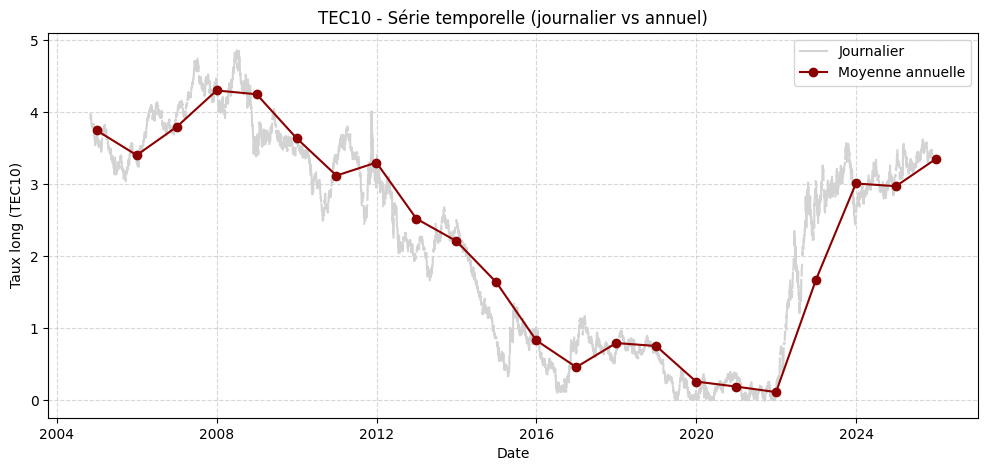

In [14]:
# Construire le DataFrame avec tes arrays
ts_df = pd.DataFrame({
    "date": date_array,
    "TEC10": tec_array
})

# Convertir en datetime et mettre comme index
ts_df["date"] = pd.to_datetime(ts_df["date"])
ts_df = ts_df.set_index("date")

# --- Résampling annuel ---
# Moyenne annuelle
ts_yearly = ts_df.resample("Y").mean()

# Ecart-type annuel
ts_yearly_std = ts_df.resample("Y").std()

print("Moyenne stationnaire (annuelle) :\n", ts_yearly)
print("Ecart-type stationnaire (annuel) :\n", ts_yearly_std)

# --- Visualisation ---
plt.figure(figsize=(12,5))
plt.plot(ts_df.index, ts_df["TEC10"], color="lightgray", label="Journalier")
plt.plot(ts_yearly.index, ts_yearly["TEC10"], color="darkred", marker="o", label="Moyenne annuelle")
plt.title("TEC10 - Série temporelle (journalier vs annuel)")
plt.xlabel("Date")
plt.ylabel("Taux long (TEC10)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Vol locale
- Importer les données historiques TEC10 (journalier ou mensuel).
- Convertir en série temporelle avec pandas.
- Résampler en mensuel (car Solveo travaille souvent en pas mensuel).
- Ajuster un modèle AR(1) sur la série mensuelle.
- Estimer a et \sigma .
- Déduire la volatilité locale.


In [45]:
# Construire le DataFrame avec tes arrays
ts_df = pd.DataFrame({
    "date": date_array,
    "TEC10": tec_array
})

# Convertir la colonne "date" en datetime
ts_df["date"] = pd.to_datetime(ts_df["date"])

# Mettre la colonne "date" comme index
ts_df = ts_df.set_index("date")

# Résampler en fin de mois
ts_monthly = ts_df["TEC10"].resample("ME").mean()

# Supprimer les NaN
ts_monthly = ts_monthly.dropna()

# Centrer la série autour de sa moyenne
y = ts_monthly.values.astype(float)   # conversion explicite en float
y = y - np.mean(y)

# Créer les variables pour AR(1)
Y_t = y[1:]          # valeurs à partir du 2e mois
Y_t_minus1 = y[:-1]  # valeurs décalées

# Ajuster AR(1)
X = sm.add_constant(Y_t_minus1)  # ajoute constante b
model = sm.OLS(Y_t, X).fit()

# Récupérer les paramètres
b = model.params[0]   # constante
a = model.params[1]   # coefficient AR(1)
sigma = np.std(model.resid)

print("Paramètre a (persistance) :", a)
print("Constante b :", b)
print("Sigma (volatilité innovations) :", sigma)

# Volatilité locale (approximation)
vol_local = sigma**2/(1 + a)*24
print("Volatilité locale estimée :", vol_local)

Paramètre a (persistance) : 0.9917201635977696
Constante b : -0.001630815770979786
Sigma (volatilité innovations) : 0.17075021053898895
Volatilité locale estimée : 0.3513220573690641


In [46]:
def estimate_solveo_params(ts_df, col="TEC10", freq="ME", shift=None):

    # --- Resampling mensuel ---
    ts_monthly = ts_df[col].resample(freq).mean().dropna()

    # --- Centrage ---
    y = ts_monthly.values.astype(float)
    y_centered = y - np.mean(y)

    # --- AR(1) estimation ---
    Y_t = y_centered[1:]
    Y_t_minus1 = y_centered[:-1]
    X = sm.add_constant(Y_t_minus1)
    model = sm.OLS(Y_t, X).fit()

    b = model.params[0]
    a = model.params[1]
    sigma = np.std(model.resid)
    print("b=",b)
    print("a=",a)
    print("sigma=",sigma)

    # --- Conversion vers Solveo params ---
    mu_stationnaire = b / (1 - a)
    sigma_stationnaire = sigma / np.sqrt(1 - a**2)
    vol_local = sigma**2/(1 + a)*24

    # Décalage : valeur minimale observée ou fixée
    if shift is None:
        shift = ts_monthly.min()

    return {
        "Moyenne stationnaire": mu_stationnaire,
        "Ecart-type stationnaire": sigma_stationnaire,
        "Volatilité locale": vol_local,
        "Décalage": shift
    }

In [47]:
# Décalage choisi
d = 0.04   # 4% en décimal

# Transformation inverse : X_n
X_n = np.log(ts_df["TEC10"].astype(float) + d).dropna()

X_df = pd.DataFrame({"Xn": X_n})
X_df.index = ts_df.loc[X_n.index].index  # assure que l’index est bien les dates


In [68]:
params = estimate_solveo_params(X_df, col="Xn", freq="Y", shift=None)

print("Paramètres Solveo estimés :")
for k, v in params.items():
    print(f"{k} : {v:.4f}")

b= -0.012612622162048153
a= 0.7992760943282808
sigma= 0.6404857613464969
Paramètres Solveo estimés :
Moyenne stationnaire : -0.0628
Ecart-type stationnaire : 1.0658
Volatilité locale : 5.4718
Décalage : -2.0415


/tmp/ipython-input-3804102885.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts_monthly = ts_df[col].resample(freq).mean().dropna()


- Solveo demande une volatilité locale, qui correspond à la variabilité d’une période à l’autre (par exemple d’un mois à l’autre).


In [69]:
# Supposons que tu as déjà construit X_df avec la colonne "Xn"
# (Xn = log(Yn + d), où Yn = TEC10 historique et d = décalage choisi)

# Calcul des différences d'une période à l'autre
diffs = X_df["Xn"].diff().dropna()

# Volatilité locale = écart-type des différences
vol_local = diffs.std()

print("Volatilité locale estimée :", vol_local)

Volatilité locale estimée : 0.09646545775946125


# Vol locale de inflation

In [53]:
print("Longueur date_array :", len(date_array))
print("Longueur inflation_array :", len(inflation_array))

Longueur date_array : 7699
Longueur inflation_array : 65


In [66]:
# Construire le DataFrame avec tes arrays
inf_df = pd.DataFrame({
    "date": date_inf_array,
    "inf": inflation_array
})

# Convertir la colonne "date" en datetime
inf_df["date"] = pd.to_datetime(inf_df["date"])

# Mettre la colonne "date" comme index
inf_df = inf_df.set_index("date")

# Décalage choisi
d = 0.04   # 4% en décimal

# Transformation inverse : X_n
X_n_inf = np.log(inf_df["inf"].astype(float) + d).dropna()

X_df_inf = pd.DataFrame({"Xn": X_n_inf})
X_df_inf.index = inf_df.loc[X_n_inf.index].index  # assure que l’index est bien les dates


# Calcul des différences d'une période à l'autre
diffs_inf = X_df_inf["Xn"].diff().dropna()

# Volatilité locale = écart-type des différences
vol_local_inf = diffs_inf.std()**2

print("Volatilité locale estimée :", vol_local_inf)

Volatilité locale estimée : 0.5417323648415263


In [70]:
import numpy as np
import pandas as pd

def calibrer_solveo_ar1(X_df, col="Xn"):
    # Vérifications de base
    if col not in X_df.columns:
        raise ValueError(f"La colonne '{col}' n'existe pas dans le DataFrame.")
    x = X_df[col].astype(float).dropna()

    # Besoin d'au moins 3 points pour AR(1)
    if len(x) < 3:
        raise ValueError("Trop peu de points pour calibrer AR(1) (>=3 requis).")

    # Variables décalées (annuelles)
    Y_t = x[1:].values
    Y_tm1 = x[:-1].values

    # Régression OLS: Y_t = a * Y_{t-1} + b + epsilon
    # On résout [Y_tm1, 1] * [a, b] = Y_t en moindres carrés
    X_design = np.column_stack([Y_tm1, np.ones_like(Y_tm1)])
    params, residuals, rank, s = np.linalg.lstsq(X_design, Y_t, rcond=None)
    a, b = params[0], params[1]

    # Innovations et leur volatilité (sigma)
    eps = Y_t - (a * Y_tm1 + b)
    sigma = np.std(eps, ddof=1)         # écart-type des innovations
    sigma2 = sigma**2

    # Moyenne et variance stationnaires (AR(1))
    # Stationnarité requiert |a| < 1
    if abs(a) >= 1:
        raise ValueError(f"Le processus n'est pas stationnaire (|a| >= 1). a = {a:.4f}")

    mu_stat = b / (1 - a)               # moyenne stationnaire
    var_stat = sigma2 / (1 - a**2)      # variance stationnaire
    std_stat = np.sqrt(var_stat)        # écart-type stationnaire

    # Volatilité locale (observée) = écart-type des incréments annuels de Xn
    diffs = x.diff().dropna().values
    vol_locale = np.std(diffs, ddof=1)

    return {
        "a": a,
        "b": b,
        "mu_stationnaire": mu_stat,
        "std_stationnaire": std_stat,
        "sigma_innov": sigma,
        "vol_locale": vol_locale
    }

# Utilisation sur ton DataFrame annuel
params = calibrer_solveo_ar1(X_df_inf, col="Xn")

print("Paramètres Solveo (annuels) :")
for k, v in params.items():
    print(f"{k} : {v:.6f}")

Paramètres Solveo (annuels) :
a : 0.759232
b : 0.224979
mu_stationnaire : 0.934423
std_stationnaire : 1.060370
sigma_innov : 0.690110
vol_locale : 0.736025
